In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/best-selling-books.csv'

In [4]:
import pandas as pd
data = pd.read_csv(file_path)

# Display the first few rows to verify
print(data.head())

                                       Book                 Author(s)  \
0                      A Tale of Two Cities           Charles Dickens   
1       The Little Prince (Le Petit Prince)  Antoine de Saint-Exupéry   
2  Harry Potter and the Philosopher's Stone             J. K. Rowling   
3                  And Then There Were None           Agatha Christie   
4            Dream of the Red Chamber (紅樓夢)                Cao Xueqin   

  Original language  First published  Approximate sales in millions  \
0           English             1859                          200.0   
1            French             1943                          200.0   
2           English             1997                          120.0   
3           English             1939                          100.0   
4           Chinese             1791                          100.0   

                Genre  
0  Historical fiction  
1             Novella  
2             Fantasy  
3             Mystery  
4         Fami

In [5]:
print(data.isnull().sum())

Book                              0
Author(s)                         0
Original language                 0
First published                   0
Approximate sales in millions     0
Genre                            56
dtype: int64


In [6]:
data['Genre'].fillna('Unknown', inplace = True)

<ipython-input-6-0019ffcbd9ab>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Genre'].fillna('Unknown', inplace = True)


In [7]:
print(data.isnull().sum())

Book                             0
Author(s)                        0
Original language                0
First published                  0
Approximate sales in millions    0
Genre                            0
dtype: int64


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
print(data.head())

                                       Book                 Author(s)  \
0                      A Tale of Two Cities           Charles Dickens   
1       The Little Prince (Le Petit Prince)  Antoine de Saint-Exupéry   
2  Harry Potter and the Philosopher's Stone             J. K. Rowling   
3                  And Then There Were None           Agatha Christie   
4            Dream of the Red Chamber (紅樓夢)                Cao Xueqin   

  Original language  First published  Approximate sales in millions  \
0           English             1859                          200.0   
1            French             1943                          200.0   
2           English             1997                          120.0   
3           English             1939                          100.0   
4           Chinese             1791                          100.0   

                Genre  
0  Historical fiction  
1             Novella  
2             Fantasy  
3             Mystery  
4         Fami

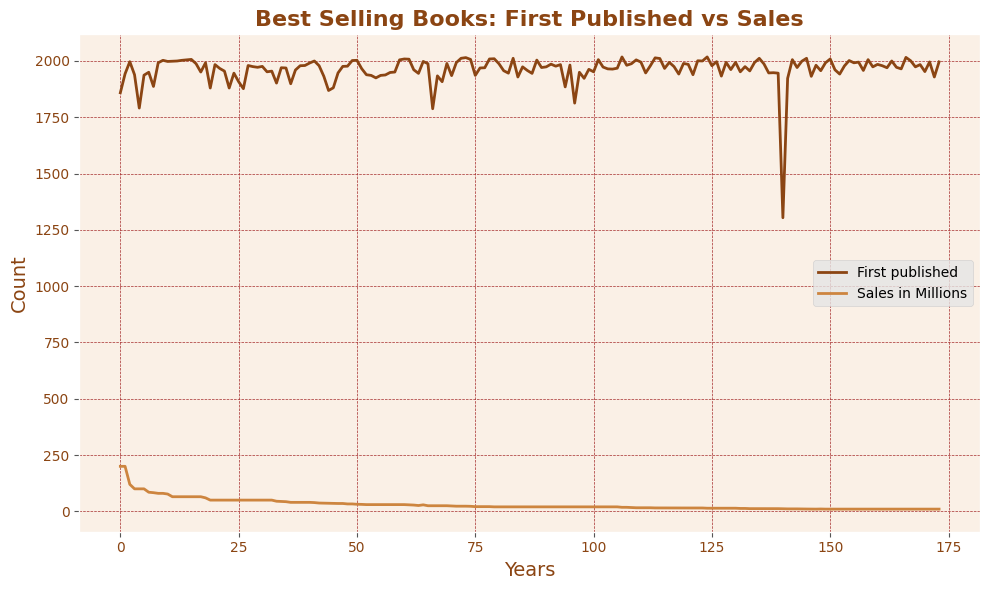

In [10]:
plt.figure(figsize=(10, 6))

# Set the background color
plt.style.use('ggplot')  # Use a style with a light background

# Plot the data with different colors for each line
plt.plot(data['First published'], color='saddlebrown', linewidth=2, label='First published')
plt.plot(data['Approximate sales in millions'], color='peru', linewidth=2, label='Sales in Millions')

# Title and labels
plt.title('Best Selling Books: First Published vs Sales', fontsize=16, fontweight='bold', color='saddlebrown')
plt.xlabel('Years', fontsize=14, color='saddlebrown')
plt.ylabel('Count', fontsize=14, color='saddlebrown')

# Add a legend
plt.legend()

# Set the grid and customize
plt.grid(color='brown', linestyle='--', linewidth=0.5)

# Customize the tick parameters
plt.xticks(color='saddlebrown')
plt.yticks(color='saddlebrown')

# Add a background color
plt.gca().set_facecolor('linen')

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-33-e183fbcdab4a>:25: UserWarning: Glyph 32005 (\N{CJK UNIFIED IDEOGRAPH-7D05}) missing from current font.
  plt.tight_layout()
<ipython-input-33-e183fbcdab4a>:25: UserWarning: Glyph 27155 (\N{CJK UNIFIED IDEOGRAPH-6A13}) missing from current font.
  plt.tight_layout()
<ipython-input-33-e183fbcdab4a>:25: UserWarning: Glyph 22818 (\N{CJK UNIFIED IDEOGRAPH-5922}) missing from current font.
  plt.tight_layout()
<ipython-input-33-e183fbcdab4a>:25: UserWarning: Glyph 2357 (\N{DEVANAGARI LETTER VA}) missing from current font.
  plt.tight_layout()
<ipython-input-33-e183fbcdab4a>:25: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
<ipython-input-33-e183fbcdab4a>:25: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
  plt.tight_layout()
<ipython-input-33-e183fbcdab4a>:25: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from current font.
  plt.tight_layout()
<ipython-input-33-e183fbcdab4a>:25: Us

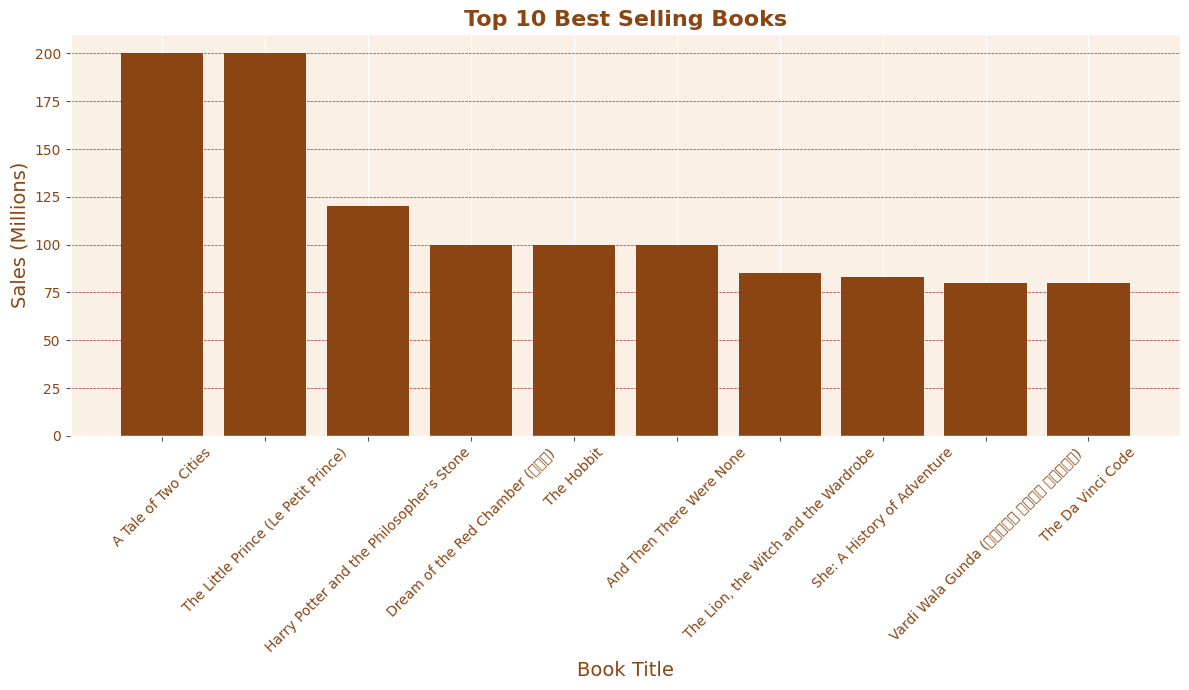

In [33]:
data_sales = data.sort_values(by='Approximate sales in millions', ascending=False).head(10)

# Create a figure
plt.figure(figsize=(12, 7))

# Bar chart
plt.bar(data_sales['Book'], data_sales['Approximate sales in millions'], color='saddlebrown')

# Title and labels
plt.title('Top 10 Best Selling Books', fontsize=16, fontweight='bold', color='saddlebrown')
plt.xlabel('Book Title', fontsize=14, color='saddlebrown')
plt.ylabel('Sales (Millions)', fontsize=14, color='saddlebrown')

# Customize the ticks
plt.xticks(rotation=45, color='saddlebrown')
plt.yticks(color='saddlebrown')

# Add a grid
plt.grid(axis='y', color='brown', linestyle='--', linewidth=0.5)

# Set the background color
plt.gca().set_facecolor('linen')

# Show the plot
plt.tight_layout()
plt.show()

In [24]:
data['Author(s)'].describe()


,Author(s)
count,174
unique,157
top,J. K. Rowling
freq,7


In [23]:


# Create a count of best-selling books by author
best_selling_books_count = data['Author(s)'].value_counts().reset_index().head(10)
best_selling_books_count.columns = ['Author(s)', 'Count']

best_selling_books_count.index = range(1, len(best_selling_books_count) + 1)

# Style the DataFrame with a brown theme
styled_table = best_selling_books_count.style \
    .set_table_attributes('style="font-size: 14px; margin: 20px; border-collapse: collapse;"') \
    .set_caption('Top 10 Authors') \
    .set_table_styles([
        {'selector': 'caption', 'props': [('color', '#8B4513'), ('font-size', '18px'), ('font-weight', 'bold'), ('font-family', 'Arial, sans-serif'), ('margin-bottom', '10px')]},
        {'selector': 'th', 'props': [('background-color', '#8B4513'), ('color', 'white')]},
        {'selector': 'td', 'props': [('border', '1px solid #A0522D'), ('padding', '10px'), ('text-align', 'center')]}
    ]) \
    .apply(lambda x: ['background-color: #D2691E' if x.name == 'Count' else '' for i in x.index], axis=0) \
    .set_properties(**{'background-color': '#F5F5DC'})

# Display the styled table
styled_table


,Author(s),Count
1,J. K. Rowling,7
2,Suzanne Collins,3
3,Dan Brown,3
4,Roald Dahl,3
5,George Orwell,2
6,Erskine Caldwell,2
7,Ken Follett,2
8,Albert Camus,2
9,E. L. James,2
10,Sam McBratney,1


In [25]:
data['Original language'].describe()

,Original language
count,174
unique,16
top,English
freq,131


In [26]:
top_languages = data['Original language'].value_counts().nlargest(10).reset_index()
top_languages.columns = ['Original language', 'Count']

# Adjust index to start from 1
top_languages.index = range(1, len(top_languages) + 1)

# Style the DataFrame with a brown theme and customized caption font
styled_language_table = top_languages.style \
    .set_table_attributes('style="font-size: 14px; margin: 20px; border-collapse: collapse;"') \
    .set_caption('Top 3 Languages in Best-Selling Books') \
    .set_table_styles([
        {'selector': 'caption', 'props': [('color', '#8B4513'), ('font-size', '18px'), ('font-weight', 'bold'), ('font-family', 'Arial, sans-serif'), ('margin-bottom', '10px')]},
        {'selector': 'th', 'props': [('background-color', '#8B4513'), ('color', 'white')]},
        {'selector': 'td', 'props': [('border', '1px solid #A0522D'), ('padding', '10px'), ('text-align', 'center')]}
    ]) \
    .set_properties(**{'background-color': '#F5F5DC'})

# Display the styled table
styled_language_table

,Original language,Count
1,English,131
2,Russian,6
3,French,5
4,German,5
5,Japanese,5
6,Chinese,4
7,Italian,4
8,Spanish,3
9,Hindi,2
10,Norwegian,2


<ipython-input-32-15ee5e6dd670>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="YlOrBr")


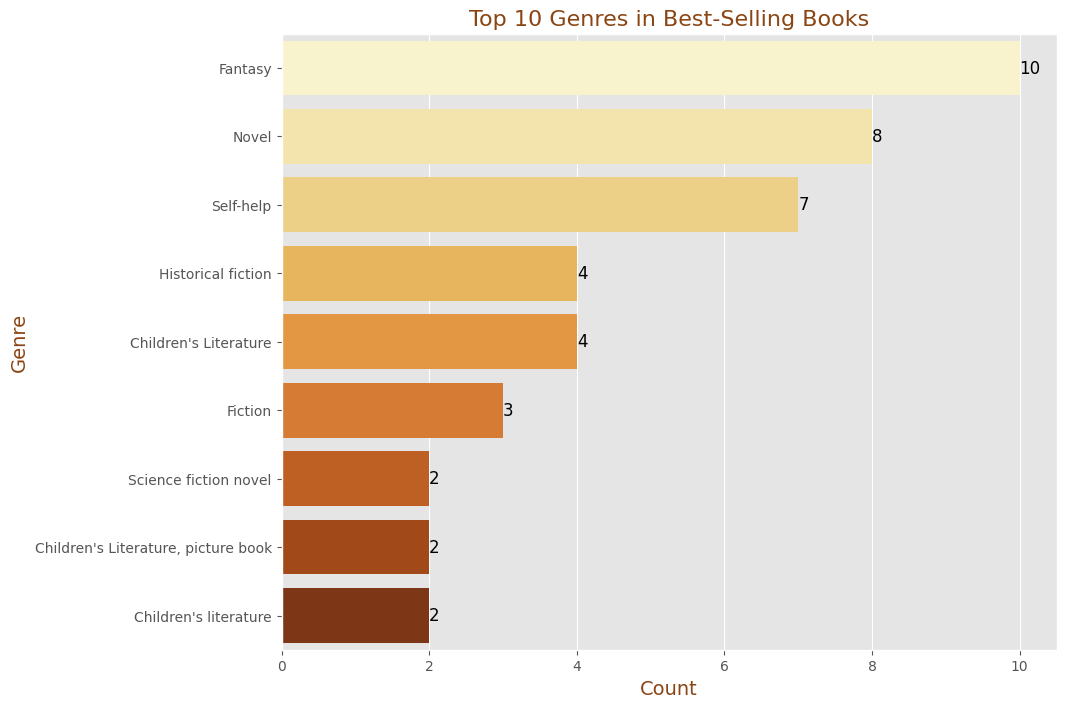

In [32]:

# Assuming data is the DataFrame containing the genres
genre_counts = data['Genre'].value_counts().head(10)

# Remove "Unknown" from the genre counts
genre_counts = genre_counts[genre_counts.index != "Unknown"]

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="YlOrBr")

# Adding titles and labels
plt.title('Top 10 Genres in Best-Selling Books', fontsize=16, color='#8B4513')
plt.xlabel('Count', fontsize=14, color='#8B4513')
plt.ylabel('Genre', fontsize=14, color='#8B4513')

# Adding value labels to each bar
for index, value in enumerate(genre_counts.values):
    plt.text(value, index, f'{value}', va='center', ha='left', color='black', fontsize=12)


plt.show()


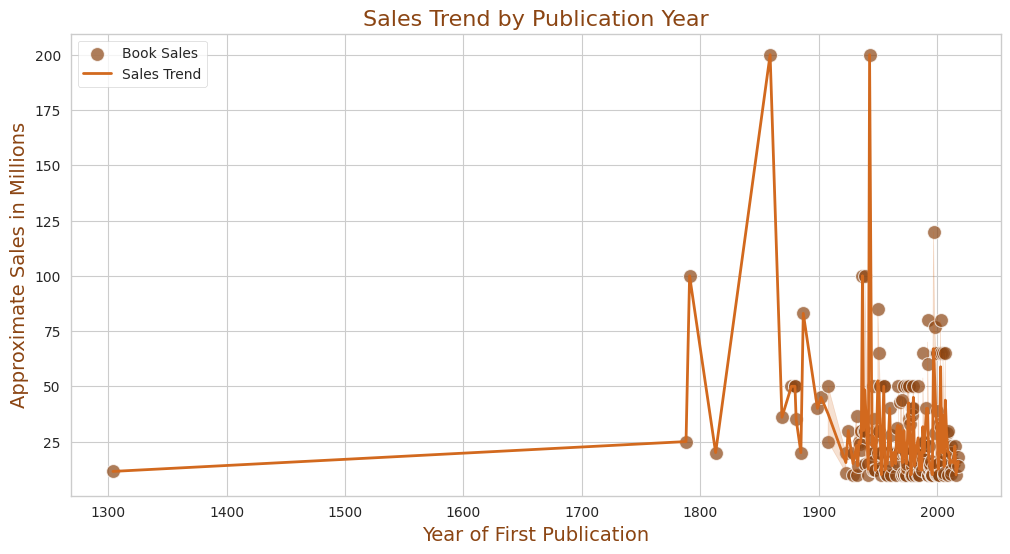

In [34]:


publication_sales_data = data[['First published', 'Approximate sales in millions']]

# Sort by 'First published' for a cleaner line plot
publication_sales_data = publication_sales_data.sort_values(by='First published')

# Set the plot size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Scatter plot for individual book sales
sns.scatterplot(
    x='First published',
    y='Approximate sales in millions',
    data=publication_sales_data,
    color='#8B4513',
    s=100,
    alpha=0.7,
    label='Book Sales'
)

# Optional: Line plot to see the general trend
sns.lineplot(
    x='First published',
    y='Approximate sales in millions',
    data=publication_sales_data,
    color='#D2691E',
    lw=2,
    label='Sales Trend'
)

# Adding titles and labels
plt.title('Sales Trend by Publication Year', fontsize=16, color='#8B4513')
plt.xlabel('Year of First Publication', fontsize=14, color='#8B4513')
plt.ylabel('Approximate Sales in Millions', fontsize=14, color='#8B4513')

# Display the plot
plt.legend()
plt.show()


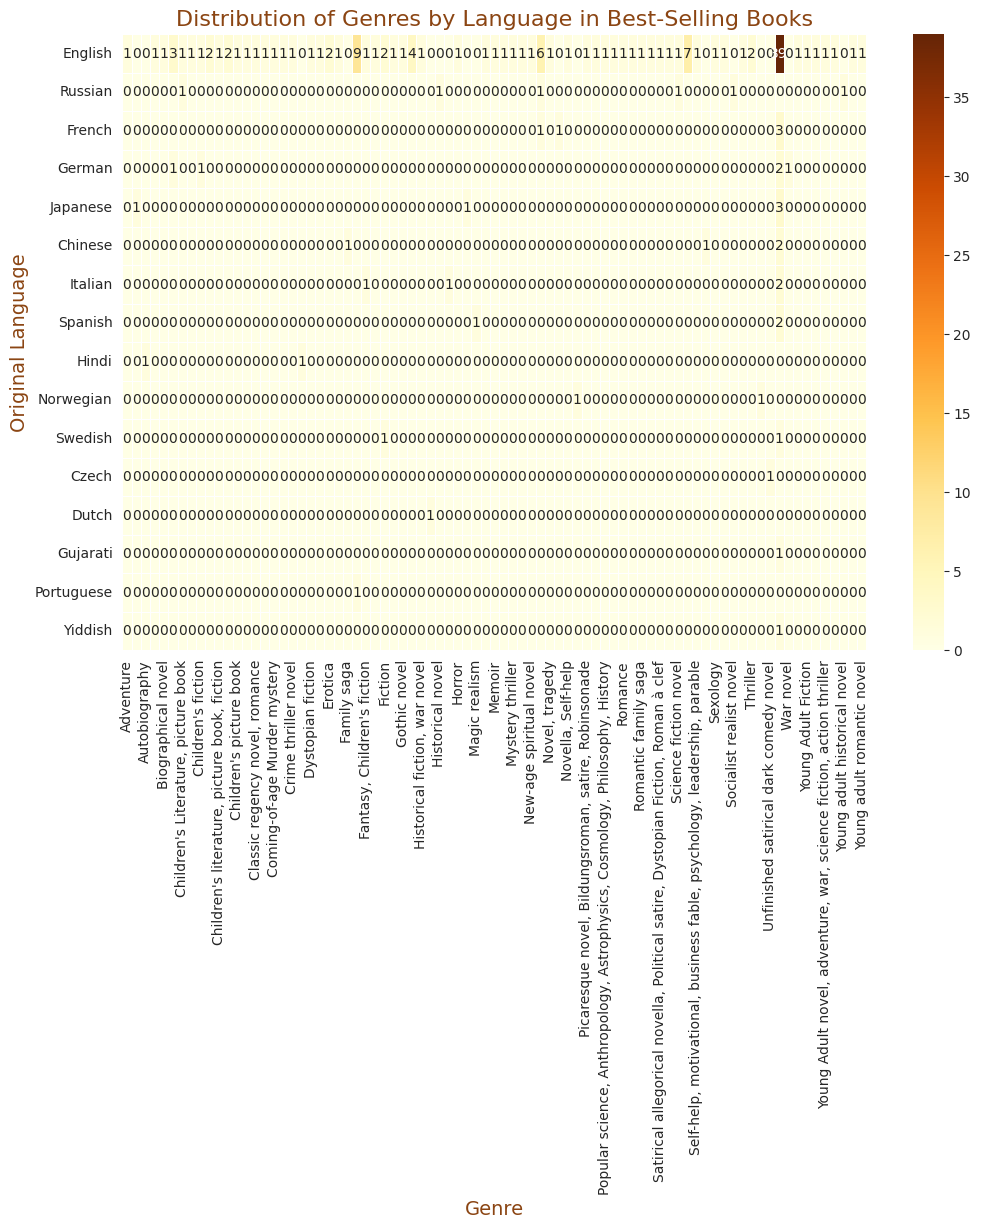

In [36]:

language_genre_counts = pd.crosstab(data['Original language'], data['Genre'])
language_genre_counts = language_genre_counts.loc[language_genre_counts.sum(axis=1).sort_values(ascending=False).index]


# Set plot size and style
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Heatmap for Language vs. Genre distribution
sns.heatmap(language_genre_counts, annot=True, cmap="YlOrBr", fmt="d", cbar=True, linewidths=0.5)

# Titles and labels
plt.title('Distribution of Genres by Language in Best-Selling Books', fontsize=16, color='#8B4513')
plt.xlabel('Genre', fontsize=14, color='#8B4513')
plt.ylabel('Original Language', fontsize=14, color='#8B4513')

plt.show()

<ipython-input-37-1f9196d6e751>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Decade'] = (data['First published'].dt.year // 10) * 10
<ipython-input-37-1f9196d6e751>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Century'] = (data['First published'].dt.year // 100) * 100


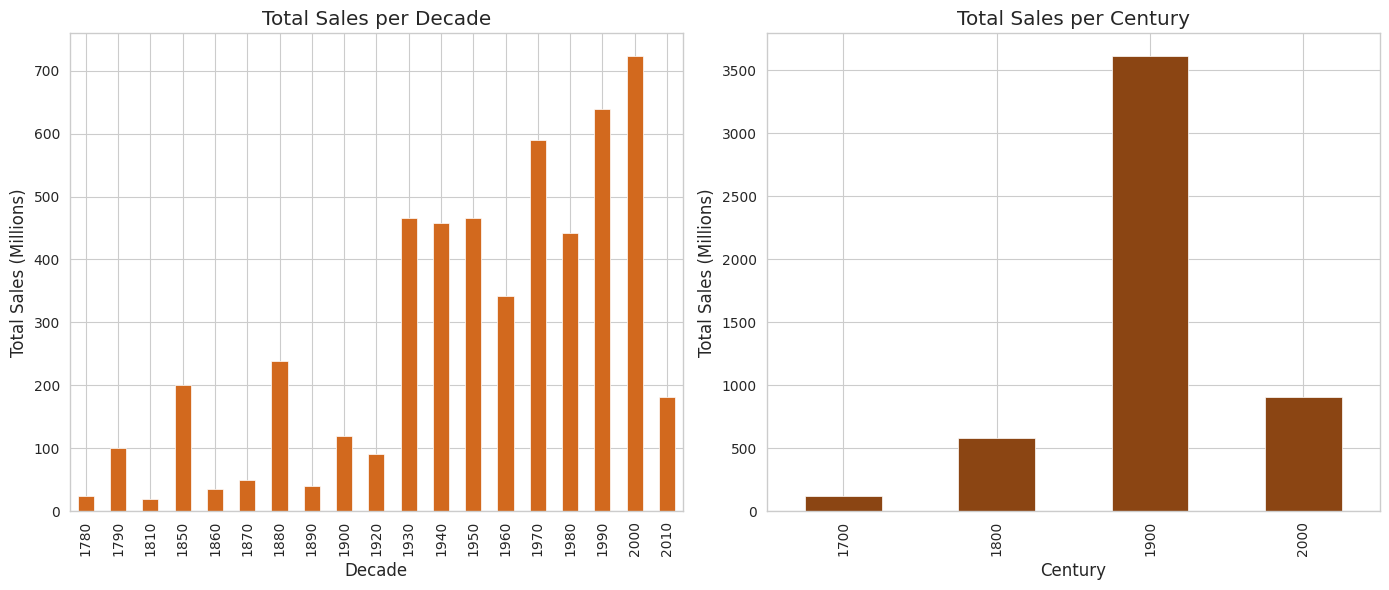

In [37]:
data['First published'] = pd.to_datetime(data['First published'], errors='coerce', format='%Y')
data = data.dropna(subset=['First published'])

# Extract the decade and century
data['Decade'] = (data['First published'].dt.year // 10) * 10
data['Century'] = (data['First published'].dt.year // 100) * 100

# Group by decade and century for total sales
decade_sales = data.groupby('Decade')['Approximate sales in millions'].sum()
century_sales = data.groupby('Century')['Approximate sales in millions'].sum()

# Plotting
plt.figure(figsize=(14, 6))

# Plot by Decade
plt.subplot(1, 2, 1)
decade_sales.plot(kind='bar', color='#D2691E')
plt.title('Total Sales per Decade')
plt.xlabel('Decade')
plt.ylabel('Total Sales (Millions)')

# Plot by Century
plt.subplot(1, 2, 2)
century_sales.plot(kind='bar', color='#8B4513')
plt.title('Total Sales per Century')
plt.xlabel('Century')
plt.ylabel('Total Sales (Millions)')

plt.tight_layout()
plt.show()

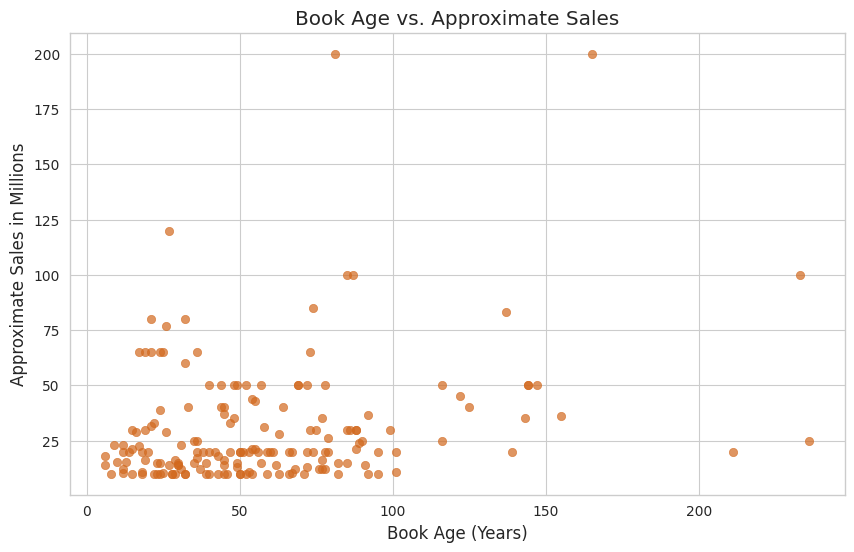

In [38]:
from datetime import datetime

# Calculate age of each book
current_year = datetime.now().year
data['Book Age'] = current_year - data['First published'].dt.year

# Plotting: Scatter plot of Book Age vs Sales
plt.figure(figsize=(10, 6))
plt.scatter(data['Book Age'], data['Approximate sales in millions'], color='#D2691E', alpha=0.7)
plt.title('Book Age vs. Approximate Sales')
plt.xlabel('Book Age (Years)')
plt.ylabel('Approximate Sales in Millions')
plt.show()


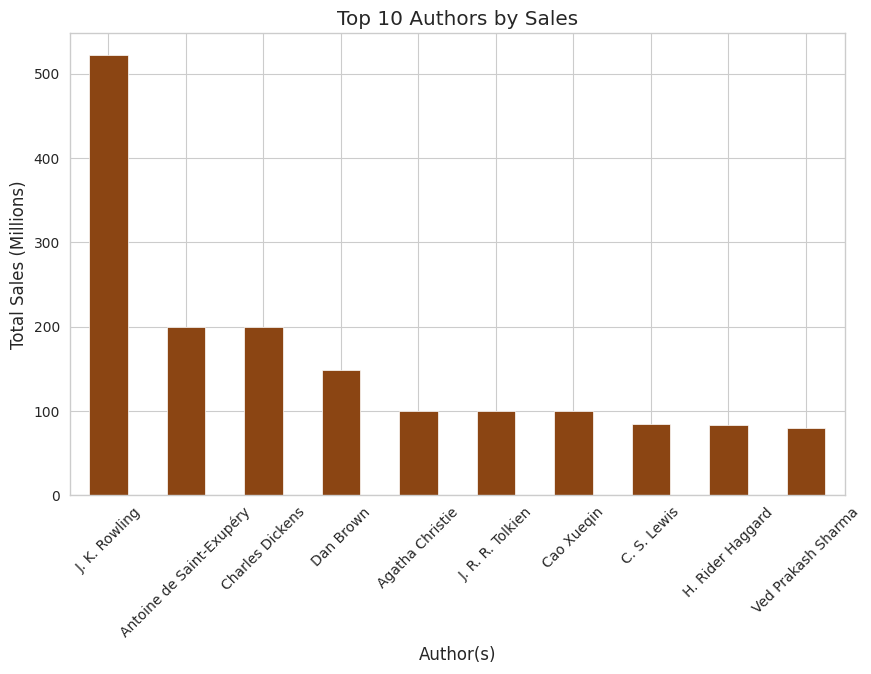

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32005 (\N{CJK UNIFIED IDEOGRAPH-7D05}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27155 (\N{CJK UNIFIED IDEOGRAPH-6A13}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22818 (\N{CJK UNIFIED IDEOGRAPH-5922}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2357 (\N{DEVANAGARI LETTER VA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10

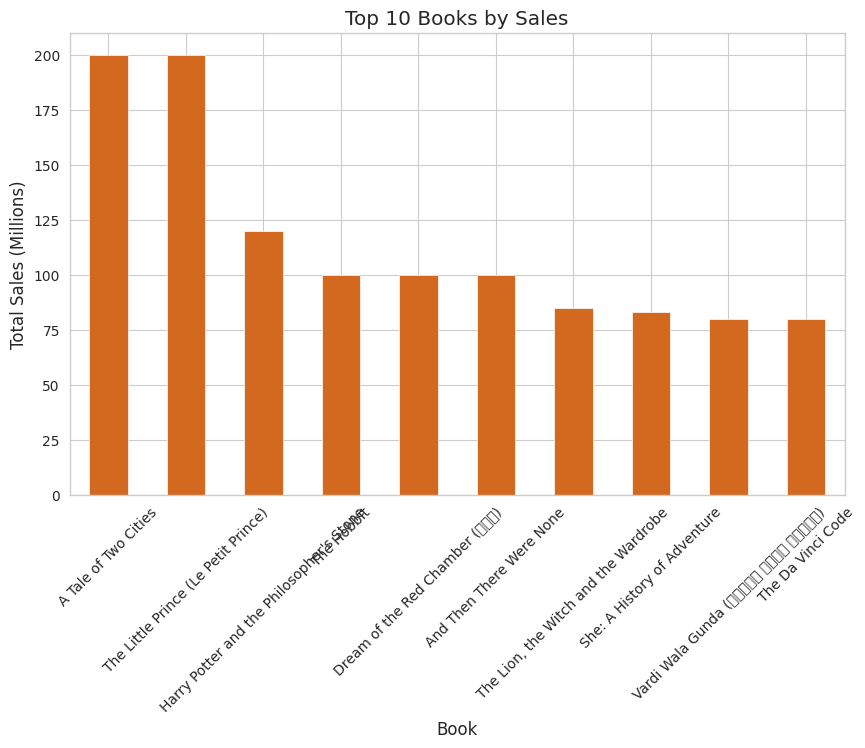

In [39]:
# Most common authors by total sales
top_authors = data.groupby('Author(s)')['Approximate sales in millions'].sum().sort_values(ascending=False).head(10)

# Most common books by total sales
top_books = data.groupby('Book')['Approximate sales in millions'].sum().sort_values(ascending=False).head(10)

# Plotting for Authors
plt.figure(figsize=(10, 6))
top_authors.plot(kind='bar', color='#8B4513')
plt.title('Top 10 Authors by Sales')
plt.xlabel('Author(s)')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=45)
plt.show()

# Plotting for Books
plt.figure(figsize=(10, 6))
top_books.plot(kind='bar', color='#D2691E')
plt.title('Top 10 Books by Sales')
plt.xlabel('Book')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=45)
plt.show()


<Figure size 1400x800 with 0 Axes>

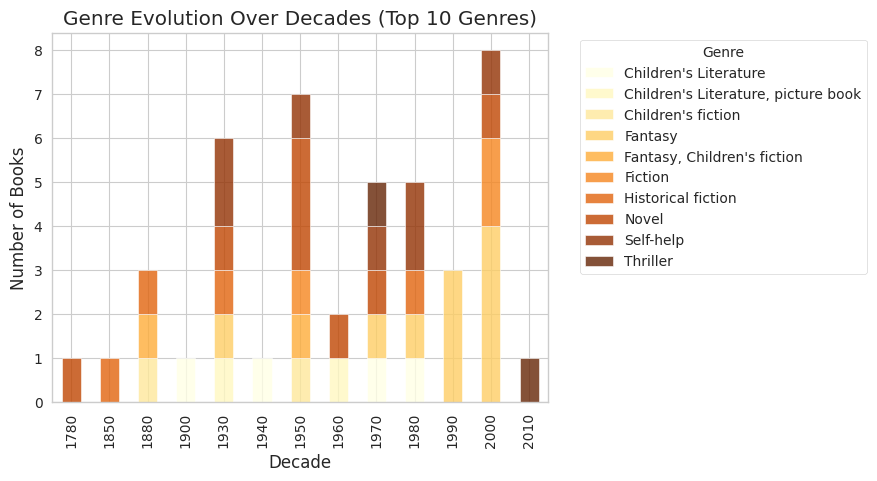

In [44]:
data_filtered = data[data['Genre'] != 'Unknown']

# Get top 10 genres based on frequency from filtered data
top_10_genres = data_filtered['Genre'].value_counts().nlargest(10).index

# Filter data to include only top 10 genres
data_top10_genres = data_filtered[data_filtered['Genre'].isin(top_10_genres)]

# Group by decade and genre
genre_decade_top10 = data_top10_genres.groupby(['Decade', 'Genre']).size().unstack(fill_value=0)

# Plotting a stacked bar chart
plt.figure(figsize=(14, 8))
genre_decade_top10.plot(kind='bar', stacked=True, colormap='YlOrBr', alpha=0.8)
plt.title('Genre Evolution Over Decades (Top 10 Genres)')
plt.xlabel('Decade')
plt.ylabel('Number of Books')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Little bit of Machine Learning





In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

# Prepare data
data['Year'] = data['First published'].dt.year
data_encoded = pd.get_dummies(data, columns=['Author(s)', 'Genre', 'Original language'])

# Features and target
X = data_encoded.drop(columns=['Approximate sales in millions', 'First published', 'Book'])
y = data_encoded['Approximate sales in millions']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')


RMSE: 17.958630772655567


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Prepare the data
X = data['Book'] + ' ' + data['Author(s)']  # Combining title and author for text features
y = data['Genre']

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Model training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


                                                          precision    recall  f1-score   support

                                           Autobiography       0.00      0.00      0.00         1
                                   Children's Literature       0.00      0.00      0.00         2
                                      Children's fiction       0.00      0.00      0.00         1
                                                 Erotica       0.00      0.00      0.00         1
                                                 Fantasy       1.00      0.50      0.67         4
                             Fantasy, Children's fiction       0.00      0.00      0.00         1
                                                 Fiction       0.00      0.00      0.00         1
                              Gothic horror, Family saga       0.00      0.00      0.00         1
                                            Gothic novel       0.00      0.00      0.00         1
                   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


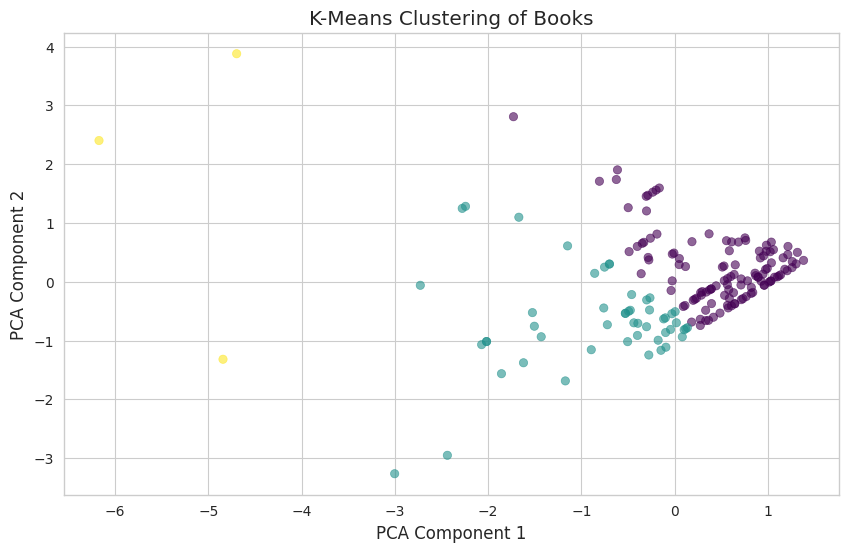

In [47]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Selecting features for clustering
features = data[['Approximate sales in millions', 'Year']]
features_normalized = (features - features.mean()) / features.std()

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_normalized)

# PCA for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_normalized)

# Plotting clusters
plt.figure(figsize=(10, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=data['Cluster'], cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering of Books')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
